# Singular Value Decomposition of an Image

### Frank Cleary | <a href="http://www.frankcleary.com">www.frankcleary.com</a> | See also: <a href="http://www.frankcleary.com/svd">Singular Value Decomposition Introduction</a> | <a href="https://gist.github.com/frankcleary/4d2bd178708503b556b0">Notebook Gist</a>

# Introduction

In my introduction to singular value decomposition (<a href="http://www.frankcleary.com/svd">link to notebook</a>), I mentioned that singular value decomposition has applications in image compression. Here I'll give a bit more explanation of how that works, and showcase some of the tools for manipulating images in python. The key here is that a black and white image is just a matrix where the numbers represent the intensity of a given pixel, which can be decomposed just like any other.

In [65]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import time
import pandas as pd
import seaborn as sns

from PIL import Image

Here I'll load an image I took of Delicate Arch in Arches National Park, and convert it to black and white.

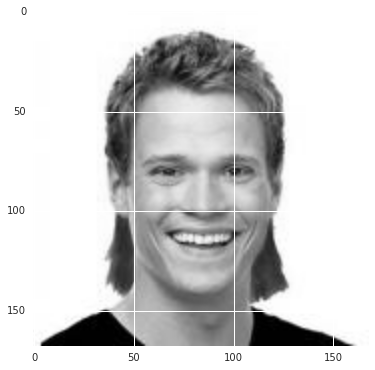

In [66]:
img = Image.open('test_svd.jpg')
imggray = img.convert('LA')
plt.figure(figsize=(9, 6))
plt.imshow(imggray);
# help(img.convert)

Now I'll convert the image data into a numpy matrix, plotting the result to show the data is unchanged.

(28224, 1)


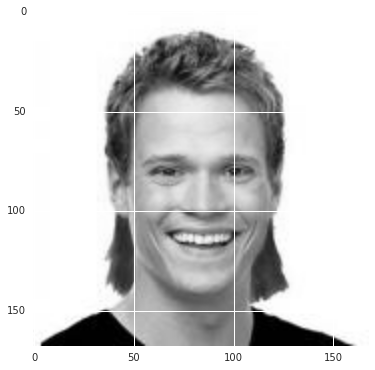

In [67]:
imgmat = np.array(list(imggray.getdata(band=0)), float)
print pd.DataFrame(imgmat).shape


imgmat.shape = (imggray.size[1], imggray.size[0])
imgmat = np.matrix(imgmat)
plt.figure(figsize=(9,6))
plt.imshow(imgmat, cmap='gray');

In [68]:
pd.DataFrame(imgmat).info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 168 entries, 0 to 167
Columns: 168 entries, 0 to 167
dtypes: float64(168)
memory usage: 220.6 KB


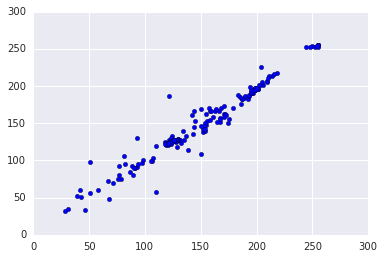

In [69]:
plt.scatter(imgmat[:,100],imgmat[:,101])

Now to compute the singular value decomposition:

In [70]:
U, sigma, V = np.linalg.svd(imgmat)

Computing an approximation of the image using the first column of $U$ and first row of $V$ reproduces the most prominent feature of the image, the light area on top and the dark area on the bottom. The darkness of the arch causes the extra darkness in the middle of the reconstruction. Each column of pixels in this image is a different weighting of the same values, $\vec{u}_1$:

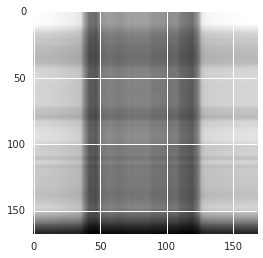

In [71]:
reconstimg = np.matrix(U[:, :1]) * np.diag(sigma[:1]) * np.matrix(V[:1, :])

plt.imshow(reconstimg, cmap='gray');

Even with just the second and third vectors, the shape of the arch begins to appear.

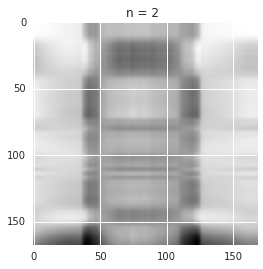

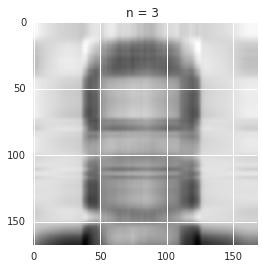

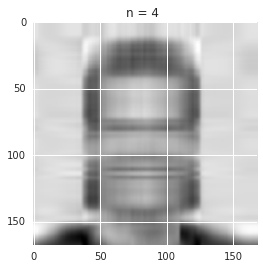

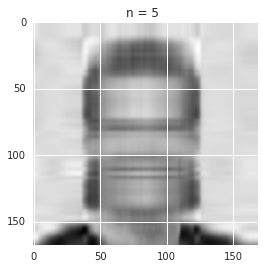

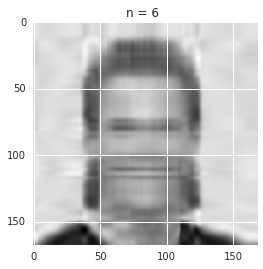

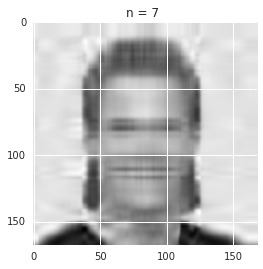

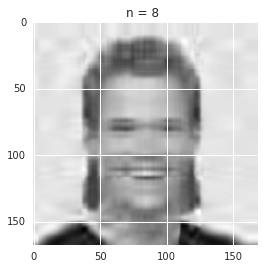

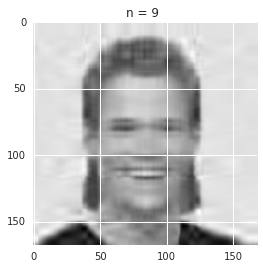

In [72]:
for i in xrange(2, 10):
    reconstimg = np.matrix(U[:, :i]) * np.diag(sigma[:i]) * np.matrix(V[:i, :])
    plt.imshow(reconstimg, cmap='gray')
    title = "n = %s " % i
    plt.title(title)
    plt.show()

The loop below shows the reconstructed image using the first $n$ vectors of the singular value decomposition ($n$ is shown in the title of the plot). The first 50 vectors produce an image very close the original image, while taking up only $\frac{50*3900+50+50*2600}{3900*2600} \approx 3.2\%$ as much space as the original data.

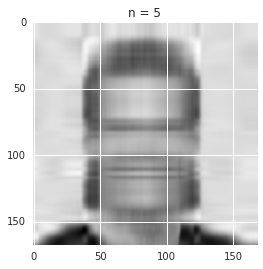

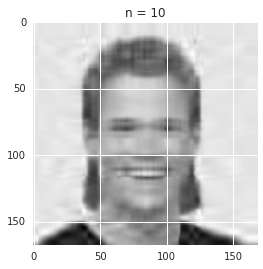

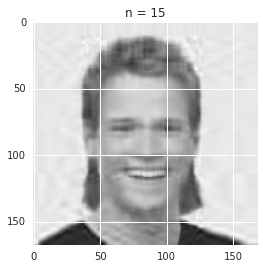

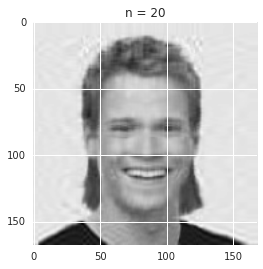

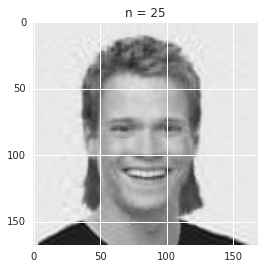

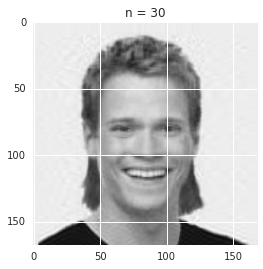

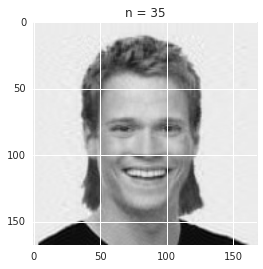

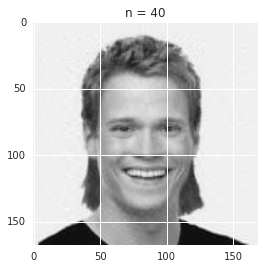

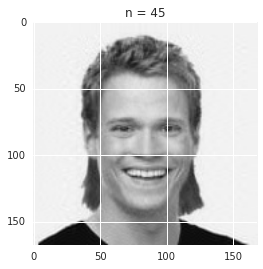

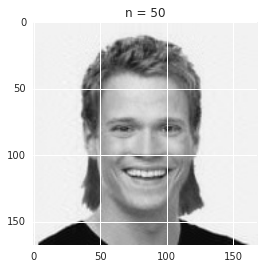

In [73]:
for i in xrange(5, 51, 5):
    reconstimg = np.matrix(U[:, :i]) * np.diag(sigma[:i]) * np.matrix(V[:i, :])
    plt.imshow(reconstimg, cmap='gray')
    title = "n = %s" % i
    plt.title(title)
    plt.show()

### See also: <a href="http://www.frankcleary.com/svd">Singular Value Decomposition Introduction</a>